In [11]:
#pip install neuralprophet // neuralprophet kütüphanesini kullandık

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [ ]:
# Dataset içindeki Verileri ve İşlem Tarihleri

In [9]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
df.Location.unique() #dataset içindeki kullanabileceğimiz şehirler

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [11]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
melb = df[df['Location']=='Moree']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head()

c:\anaconda\envs\ia\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
12067,2009-01-01,Moree,16.4,38.7,0.0,12.2,9.3,NW,54.0,N,...,27.0,11.0,1005.5,1003.3,6.0,8.0,28.9,37.4,No,No
12068,2009-01-02,Moree,22.3,30.3,0.0,11.2,3.0,NNE,30.0,NNE,...,68.0,40.0,1009.5,1009.0,6.0,7.0,25.2,29.4,No,No
12069,2009-01-03,Moree,21.2,33.3,0.0,6.2,11.7,ENE,46.0,ENE,...,57.0,31.0,1014.9,1012.2,6.0,5.0,24.5,32.7,No,No
12070,2009-01-04,Moree,16.4,33.5,0.0,11.2,13.3,ENE,39.0,NE,...,51.0,28.0,1016.9,1012.2,1.0,3.0,22.9,31.9,No,No
12071,2009-01-05,Moree,19.2,34.5,0.0,12.6,13.4,SE,35.0,ENE,...,44.0,22.0,1015.1,1010.6,1.0,6.0,24.2,32.9,No,No


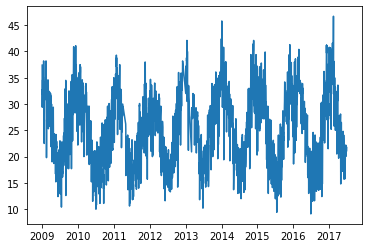

In [13]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

c:\anaconda\envs\ia\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


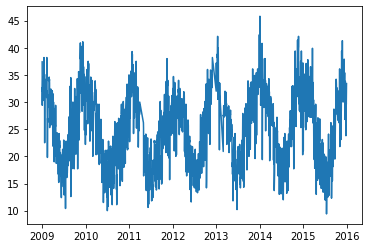

In [14]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [15]:
data = melb[['Date', 'Temp3pm']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

c:\anaconda\envs\ia\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ds,y
12067,2009-01-01,37.4
12068,2009-01-02,29.4
12069,2009-01-03,32.7
12070,2009-01-04,31.9
12071,2009-01-05,32.9


In [16]:
# Model eğitme

In [17]:
m = NeuralProphet()

In [18]:
model = m.fit(data, freq='D', epochs=1000)

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[1000/1000]: 100%|█████████████████| 1000/1000 [01:49<00:00,  9.14it/s, SmoothL1Loss=0.00706, MAE=2.75, RegLoss=0]


In [ ]:
# Hava Tahmini

In [19]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2016-01-01,None,31.714787,NaN,25.761286,6.019756,-0.066255
1,2016-01-02,None,31.683144,NaN,25.759903,6.083775,-0.160534
2,2016-01-03,None,31.992771,NaN,25.758518,6.147415,0.086837
3,2016-01-04,None,32.075966,NaN,25.757133,6.210155,0.108675
4,2016-01-05,None,32.038960,NaN,25.755751,6.271474,0.011735


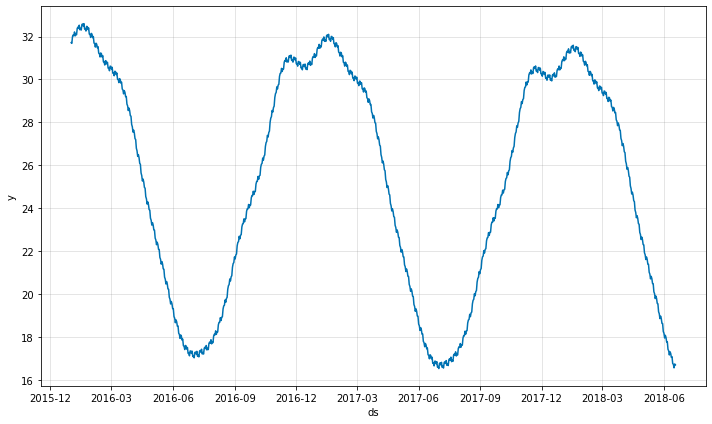

In [20]:
plot1 = m.plot(forecast)

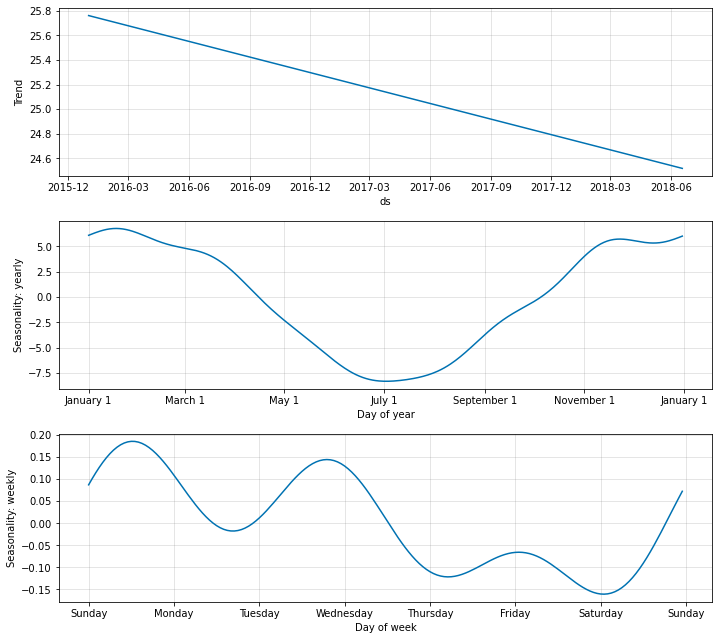

In [21]:
plt2 = m.plot_components(forecast)